<a href="https://colab.research.google.com/github/LennartReddm/AntWalkProblem/blob/main/Ant_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from google.colab import data_table
import sympy as sp
from IPython.display import display, Math

# Optiver Ant Walk Problem

An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn’t know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

1. If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?

2. What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?

3. Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by ( (x – 2.5cm) / 30cm )2 + ( (y – 2.5cm) / 40cm )2 < 1 in coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.

## Question 1. Time to Reach Food Boundary

If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?

### Analytical Solution

We are dealing with a 2-dimensional random walk on a 5-by-5 grid. In order to calculate the average time, we want to know the average number of steps that the ant needs to hit the boundary of the grid. We can visualize the problem like this:






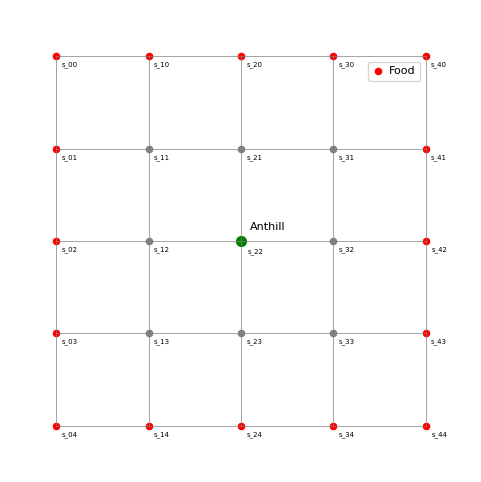

In [2]:
# Plot of the 5-by-5 grid
fig, ax = plt.subplots(figsize=(6,6))
# Draw thin lines connecting the dots
for i in range(5):
    ax.plot([0.5 + i, 0.5 + i], [0.5, 4.5], color='grey', linestyle='-', linewidth=0.5)
    ax.plot([0.5, 4.5], [0.5 + i, 0.5 + i], color='grey', linestyle='-', linewidth=0.5)
# Draw dots at the center of each square
for i in range(5):
    for j in range(5):
        if i == 2 and j == 2:
            ax.scatter(i + 0.5, j + 0.5, color='green', s=50)
            ax.text(i + 0.6, j + 0.6, 'Anthill', ha='left', va='bottom', fontsize=8, color='black')
            ax.text(i + 0.74, j + 0.35, "s_{}{}".format(i , j), ha='right', va='bottom', fontsize=5, color='black')
        else:
            dot_color = 'red' if i == 0 or i == 4 or j == 0 or j == 4 else 'grey'
            ax.scatter(i + 0.5, j + 0.5, color=dot_color, s=20)
            ax.text(i + 0.73, j + 0.37, "s_{}{}".format(i , 4 - j), ha='right', va='bottom', fontsize=5, color='black')
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal', 'box')

# Add legend for Food
ax.scatter([], [], color='red', s=20, label="Food")
legend = ax.legend(loc="upper right", bbox_to_anchor=(0.90, 0.90), fontsize=8, handlelength=1, handletextpad=0.5)

# Remove the border surrounding the plot
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

One possible approach to this problem is to use recursive formulations modelling the expected number of steps from each position of the grid and then solve the resulting system of equations.

Let (i, j) be a position on the grid with 0 <= i <= 4 and 0 <= j <= 4. The ant takes steps in each direction with equal probabilties p$_{l}$, p$_{r}$, p$_{u}$, p$_{d}$ = 0.25.

Let s$_{i, j}$ be the expected number of steps from point (i, j).

Using the total law of probabilty, we can model the expected number of steps from (i, j) as:

s$_{i, j}$ = 1 + p$_{ l }$ * s$_{i-1, j}$ + p$_{ r }$ * s$_{i+1, j}$ + p$_{ u }$ * s$_{i, j-1}$ + p$_{ d }$ * s$_{i, j+1}$

In words, the expected number of steps from position (i, j) is 1 (the first step) plus the weigthed sum of the expected number of steps from the neighboring positions.

We can use this approach to model the expected number of steps from each of the 9 positions within the grid.

For the 12 reachable positions on the food border on the other hand, no further steps need to be taken. The expected number of steps for these positions is therefore simply:

s$_{i, j}$ = 0

Let's implement the full system of equations using Python's SymPy package:

In [3]:
# Create the symbols we will use for SymPy
symbols_string = ' '.join([f's_{i}{j}' for i in range(5) for j in range(5)])
s_00, s_01, s_02, s_03, s_04, s_10, s_11, s_12, s_13, s_14, s_20, s_21, s_22, s_23, s_24, s_30, s_31, s_32, s_33, s_34, s_40, s_41, s_42, s_43, s_44 = sp.symbols(symbols_string)
ant_symbols = [s_01, s_02, s_03, s_10, s_11, s_12, s_13, s_14, s_20, s_21, s_22, s_23, s_24, s_30, s_31, s_32, s_33, s_34, s_41, s_42, s_43] # Note that we remove the corners since the ant can not reach these points.

In [4]:
# We implement the equations for the 9 positions within the grid and the 12 positions on the food boundary as discussed above.
ant_equations = [
    sp.Eq(s_01, 0),
    sp.Eq(s_02, 0),
    sp.Eq(s_03, 0),

    sp.Eq(s_10, 0),
    sp.Eq(s_11, 1 + 0.25 * s_01 + 0.25 * s_21 + 0.25 * s_10 + 0.25 * s_12),
    sp.Eq(s_12, 1 + 0.25 * s_02 + 0.25 * s_22 + 0.25 * s_11 + 0.25 * s_13),
    sp.Eq(s_13, 1 + 0.25 * s_03 + 0.25 * s_23 + 0.25 * s_12 + 0.25 * s_14),
    sp.Eq(s_14, 0),

    sp.Eq(s_20, 0),
    sp.Eq(s_21, 1 + 0.25 * s_11 + 0.25 * s_31 + 0.25 * s_20 + 0.25 * s_22),
    sp.Eq(s_22, 1 + 0.25 * s_12 + 0.25 * s_32 + 0.25 * s_21 + 0.25 * s_23),
    sp.Eq(s_23, 1 + 0.25 * s_13 + 0.25 * s_33 + 0.25 * s_22 + 0.25 * s_24),
    sp.Eq(s_24, 0),

    sp.Eq(s_30, 0),
    sp.Eq(s_31, 1 + 0.25 * s_21 + 0.25 * s_41 + 0.25 * s_30 + 0.25 * s_32),
    sp.Eq(s_32, 1 + 0.25 * s_22 + 0.25 * s_42 + 0.25 * s_31 + 0.25 * s_33),
    sp.Eq(s_33, 1 + 0.25 * s_23 + 0.25 * s_43 + 0.25 * s_32 + 0.25 * s_34),
    sp.Eq(s_34, 0),

    sp.Eq(s_41, 0),
    sp.Eq(s_42, 0),
    sp.Eq(s_43, 0)
]

# Turn the system of equations into matrix form.
A, b = sp.linear_eq_to_matrix(ant_equations, ant_symbols)

In [5]:
# Let's take look at the system of equations in matrix form.
latex_representation = f"\\tiny{sp.latex(A)} \\times {sp.latex(sp.Matrix(ant_symbols))} = {sp.latex(b)}"
display(Math(latex_representation))

<IPython.core.display.Math object>

In [6]:
# And solve it for the expected number of steps.
sp.solve(ant_equations, ant_symbols)

{s_01: 0.0,
 s_02: 0.0,
 s_03: 0.0,
 s_10: 0.0,
 s_11: 2.75000000000000,
 s_12: 3.50000000000000,
 s_13: 2.75000000000000,
 s_14: 0.0,
 s_20: 0.0,
 s_21: 3.50000000000000,
 s_22: 4.50000000000000,
 s_23: 3.50000000000000,
 s_24: 0.0,
 s_30: 0.0,
 s_31: 2.75000000000000,
 s_32: 3.50000000000000,
 s_33: 2.75000000000000,
 s_34: 0.0,
 s_41: 0.0,
 s_42: 0.0,
 s_43: 0.0}

We can see that the expected number of steps for the ant starting from the "Anthill"-position is s$_{2, 2}$ = 4.5. In other words, it will take the ant on average 4.5 seconds to reach the food border.


### Simulation

To check if our solution is correct, we can also simulate the ant walk and calculate the average time needed to reach the boundary:

In [7]:
# Define number of rows and columns for 2 dimensional grid.
rows, cols = 5, 5

directions = [(0, 1), (0, -1), (1, 0), (-1, 0)] # Define directions
steps_list = []
# Simulate random walk 1000000 times.
for i in range(0, 1000000):
    x, y = 2, 2 # Starting position
    steps = 0 # Set steps to 0.
    while 0 < x < (rows-1) and 0 < y < (cols-1): # Proceed while position is not the boundary
        dx, dy = random.choice(directions)
        x, y = x + dx, y + dy
        steps += 1
        # print(x, y, steps)
    steps_list.append(steps)

steps_avg = np.mean(steps_list) # Calculate average number of steps

print(steps_avg)

4.498889


Indeed, our simulation confirms that the ant needs on average 4.5 steps or 4.5 seconds to reach the border.

## Question 2. Time to Reach Food on Diagonal Line

What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?

// TO BE DONE

## Question 3. Generalized Simulation & Ellipse Formed Boundary Problem

Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by ( (x – 2.5cm) / 30cm )^2 + ( (y – 2.5cm) / 40cm )^2 < 1 in coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.

### Simulation Script

These are actually two questions. First, we have to come up with a script that generalizes the simulation of the ant walk, depending on the starting position, food boundary, and number of iterations:

In [8]:
# Function with arguments for starting position, boundary criterion, and number of iterations.
def ant_walk_simulation(x_start, y_start, boundary_crit, iterations):
  directions = [(0, 1), (0, -1), (1, 0), (-1, 0)] # Define directions
  steps_list = [] # Create empty list for steps
  # Simulate random walk.
  for i in range(0, iterations):
      x, y = x_start, y_start # Starting position
      steps = 0 # Set steps to 0.
      # print(i)
      while boundary_crit(x, y): # Proceed while position is not the boundary
          dx, dy = random.choice(directions)
          x, y = x + dx, y + dy
          steps += 1
          # print(x, y, steps)
      steps_list.append(steps)
  steps_avg = np.mean(steps_list)
  return steps_avg

We can test this for the 5-by-5 grid food boundary from question 1 for which we already have the solution. Indeed, our new simulation script gives us an estimate of the average time close to 4.5 seconds.

In [9]:
# Start in the center
x_start = 0
y_start = 0

# Simulate it for 100000 times
iterations = 100000

# We define the boundary in terms of x and y coordinates.
def boundary_crit(x, y):
    return -2 < x < 2 and -2 < y < 2

ant_walk_simulation(x_start, y_start, boundary_crit, iterations)

4.51354

### Time to Reach Ellipse Formed Boundary

The formula ((x – 2.5cm) / 30cm )^2 + ((y – 2.5cm) / 40cm)^2 defines and ellipse centered at x = 2.5 and y = 2.5 with a major axis = 40 cm and a minor axis = 30 cm. Let's get a visual impression:

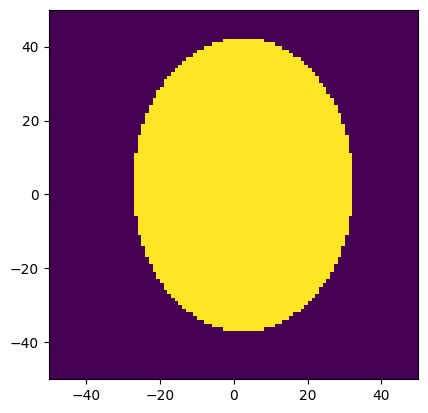

In [10]:
x0 = 2.5
y0 = 2.5
a = 30
b = 40

x = np.linspace(-50, 50, 100)  # x values of interest
y = np.linspace(-50, 50, 100)[:, None]  # y values of interest, as a "column" array

ellipse = (((x - x0) / a) ** 2) + (((y - y0) / b) ** 2) <= 1  # True for points inside the ellipse

plt.imshow(ellipse, extent=(x[0], x[-1], y[0, 0], y[-1, 0]), origin="lower")
plt.show()

We can now use our simulation script to find an estimate for the average time the ant needs to reach the ellipse-formed boundary starting at the anthill at x=0, y=0.

In [13]:
# The anthill is positioned at 0, 0.
x_start = 0
y_start = 0

# Number of simulations
iterations = 1000000

# We define the boundary in terms of x and y coordinates using the ellipse formula.
def boundary_crit(x, y):
    return (((x - 0.25) / 3) ** 2 + ((y - 0.25) / 4) ** 2 <= 1)

ant_walk_simulation(x_start, y_start, boundary_crit, iterations)

14.000649

We estimate that the ant needs on average 14 seconds to reach the ellipse.